# Immediate False Memories Analysis

In [1]:
import os 
os.getcwd()

# print()

'/Users/erc/Desktop/Utrecht University/2024_p3_Experimentation in Psychology Linguistics and AI/Final Report/Data Analysis'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scikit_posthocs as sp


# Load data
# Assuming 'df' is your DataFrame and it has columns 'none', 'survey-based', 'static-chatbot', 'chatbot' with the data
df = pd.read_csv('/Users/erc/Desktop/Utrecht University/2024_p3_Experimentation in Psychology Linguistics and AI/Final Report/Data Analysis/INFOMELP_April 12, 2025_16.02.csv')

# # Create a new DataFrame with only the columns you need
# df_classes = df[['none', 'survey-based', 'static-chatbot', 'chatbot']]

In [3]:
# Removing header rows
df = df.iloc[2:]
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,attitude/trust in ai_6,attitude/trust in ai_7,attitude/trust in ai_8,attitude/trust in ai_9,attitude/trust in ai_10,attitude/trust in ai_11,DemModQues_personal,DemModQues_interest,Exp_condition,Qualtrics_code
2,2025-03-27 05:39:13,2025-03-27 05:59:13,Survey Preview,*******,100,1200,True,2025-03-27 05:59:13,R_537JHgali9GFdUq,*******,...,5,6,5,6,6,6,No,6,static-chatbot,NaN
3,2025-03-28 11:06:01,2025-03-28 11:21:39,IP Address,*******,100,938,True,2025-03-28 11:21:40,R_8HtOBJlnewGgwzK,*******,...,1 (strongly disagree),1 (strongly disagree),1 (strongly disagree),1 (strongly disagree),1 (strongly disagree),1 (strongly disagree),Yes,7-Very interested,chatbot,NaN
4,2025-03-28 13:17:10,2025-03-28 13:43:33,IP Address,*******,100,1583,True,2025-03-28 13:43:34,R_2OGFTt5r8WDBj5B,*******,...,2,5,3,5,5,4,No,6,chatbot,NaN
5,2025-03-28 14:00:02,2025-03-28 14:17:38,IP Address,*******,100,1056,True,2025-03-28 14:17:39,R_20YkqRnmFc4oGpo,*******,...,1 (strongly disagree),1 (strongly disagree),2,6,4,3,No,2,none,NaN
6,2025-03-29 10:17:07,2025-03-29 10:48:23,IP Address,*******,100,1876,True,2025-03-29 10:48:23,R_2SIEWIVXhPAFjGd,*******,...,2,4,4,2,1 (strongly disagree),3,No,4,static-chatbot,NaN
7,2025-03-29 10:57:02,2025-03-29 11:55:43,IP Address,*******,100,3521,True,2025-03-29 11:55:44,R_8gITljZjjFMXSYR,*******,...,3,4,4,4,4,4,No,5,none,NaN
8,2025-03-31 07:25:26,2025-03-31 07:52:15,IP Address,*******,100,1608,True,2025-03-31 07:52:15,R_2db1UnskvmDoVcl,*******,...,3,3,2,5,4,4,No,5,chatbot,NaN
9,2025-03-31 07:23:14,2025-04-01 11:10:09,IP Address,*******,100,100015,True,2025-04-01 11:10:10,R_2mCOSN6P23hma87,*******,...,4,5,5,4,4,4,No,4,none,NaN
10,2025-04-02 05:07:33,2025-04-02 05:39:15,IP Address,*******,100,1901,True,2025-04-02 05:39:16,R_3Wfdyj9VyM8yW0V,*******,...,5,5,4,5,5,5,No,5,chatbot,NaN
11,2025-04-02 05:46:58,2025-04-02 06:18:06,IP Address,*******,100,1867,True,2025-04-02 06:18:06,R_8VDaLOMAFhST5Pz,*******,...,7 (strongly agree),3,4,6,6,4,No,2,chatbot,NaN


In [13]:
# Convert 'StartDate' to datetime using .loc to avoid SettingWithCopyWarning
df.loc[:, 'StartDate'] = pd.to_datetime(df['StartDate'])


# Assuming 'ResponseId' might be used as a placeholder for an ID filter
# This is just a demonstration since we don't have specifics about the prolific ID.
# filtered_df = df[(df['StartDate'] >= filter_date) & (df['Status'] != 'Survey Preview') & ((df['attention_check_1'] != 'Probably not') or (df['attention_check_2'] != 'Yes') or (df['attention_check_3'] != 'Definitely not'))]

filtered_df = df[
    (df['Exp_condition'].notna()) &
    (df['Status'] != 'Survey Preview') 
    # (
    #     (df['attention_check_1'] == 'Probably not') &
    #     (df['attention_check_2'] == 'Yes') &
    #     (df['attention_check_3'] == 'Definitely not')
    # )
]


In [14]:
filtered_df.shape

(27, 86)

In [15]:
# Specifying the columns to keep
columns_to_keep = ['Exp_condition', 'PostQues_3', 'PostQues_10', 'PostQues_14', 'PostQues_20', 'PostQues_25']

# Creating a new DataFrame with only the selected columns
filtered_columns_df = filtered_df[columns_to_keep]

In [16]:
filtered_columns_df

,Exp_condition,PostQues_3,PostQues_10,PostQues_14,PostQues_20,PostQues_25
3,chatbot,Yes,Definitely not,No,Definitely yes,Probably yes
4,chatbot,No,Yes,Uncertain if yes or no,No,Uncertain if yes or no
5,none,Definitely not,No,Probably not,Uncertain if yes or no,Probably not
6,static-chatbot,Uncertain if yes or no,Probably not,No,Uncertain if yes or no,Uncertain if yes or no
7,none,Probably not,Probably not,Probably not,Uncertain if yes or no,Uncertain if yes or no
8,chatbot,Probably yes,No,Definitely not,Definitely yes,Definitely not
9,none,Definitely not,Uncertain if yes or no,Probably not,Probably yes,Uncertain if yes or no
10,chatbot,No,Yes,Yes,No,Yes
11,chatbot,Yes,Definitely yes,No,Probably yes,Uncertain if yes or no
12,static-chatbot,Definitely not,Probably yes,Definitely not,Definitely yes,Definitely not


In [17]:
 # Define the mapping from text to numeric values
replacement_map = {
    'Definitely yes': 7,
    'Yes': 6,
    'Probably yes': 5,
    'Uncertain if yes or no': 4,
    'Probably not': 3,
    'No': 2,
    'Definitely not': 1
}

# Replace the categorical responses with numeric values across the DataFrame
filtered_columns_df.replace(replacement_map, inplace=True)

# Display the first few rows to confirm the replacements
filtered_columns_df

/var/folders/nr/3wfjzp7j2ss9g2n1rps6fd880000gn/T/ipykernel_29332/3021226403.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_columns_df.replace(replacement_map, inplace=True)
/var/folders/nr/3wfjzp7j2ss9g2n1rps6fd880000gn/T/ipykernel_29332/3021226403.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns_df.replace(replacement_map, inplace=True)


,Exp_condition,PostQues_3,PostQues_10,PostQues_14,PostQues_20,PostQues_25
3,chatbot,6,1,2,7,5
4,chatbot,2,6,4,2,4
5,none,1,2,3,4,3
6,static-chatbot,4,3,2,4,4
7,none,3,3,3,4,4
8,chatbot,5,2,1,7,1
9,none,1,4,3,5,4
10,chatbot,2,6,6,2,6
11,chatbot,6,7,2,5,4
12,static-chatbot,1,5,1,7,1


In [14]:
filtered_columns_df

,Exp_condition,PostQues_3,PostQues_10,PostQues_14,PostQues_20,PostQues_25
36,survey-based,4,5,4,4,2
37,static-chatbot,4,3,2,4,2
38,none,1,2,2,4,1
39,chatbot,4,3,2,2,2
40,none,2,6,2,4,2
...,...,...,...,...,...,...
236,static-chatbot,5,7,2,6,4
237,static-chatbot,1,5,3,6,4
239,survey-based,4,2,1,7,1
240,chatbot,4,6,2,4,2


In [18]:
filtered_columns_df['false_memories'] = filtered_columns_df.apply(lambda row: (row.iloc[1:] > 4).sum(), axis=1)

/var/folders/nr/3wfjzp7j2ss9g2n1rps6fd880000gn/T/ipykernel_29332/4278997254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns_df['false_memories'] = filtered_columns_df.apply(lambda row: (row.iloc[1:] > 4).sum(), axis=1)


In [19]:
filtered_columns_df

,Exp_condition,PostQues_3,PostQues_10,PostQues_14,PostQues_20,PostQues_25,false_memories
3,chatbot,6,1,2,7,5,3
4,chatbot,2,6,4,2,4,1
5,none,1,2,3,4,3,0
6,static-chatbot,4,3,2,4,4,0
7,none,3,3,3,4,4,0
8,chatbot,5,2,1,7,1,2
9,none,1,4,3,5,4,1
10,chatbot,2,6,6,2,6,3
11,chatbot,6,7,2,5,4,3
12,static-chatbot,1,5,1,7,1,2


In [20]:
filtered_columns_df['false_memories'].value_counts()

false_memories
2    9
1    8
0    5
3    4
4    1
Name: count, dtype: int64

In [21]:
control_df = filtered_columns_df.loc[filtered_columns_df['Exp_condition'] == 'none']
prescripted_df = filtered_columns_df.loc[filtered_columns_df['Exp_condition'] == 'static-chatbot']
generative_df = filtered_columns_df.loc[filtered_columns_df['Exp_condition'] == 'chatbot']

In [22]:
filtered_columns_df

,Exp_condition,PostQues_3,PostQues_10,PostQues_14,PostQues_20,PostQues_25,false_memories
3,chatbot,6,1,2,7,5,3
4,chatbot,2,6,4,2,4,1
5,none,1,2,3,4,3,0
6,static-chatbot,4,3,2,4,4,0
7,none,3,3,3,4,4,0
8,chatbot,5,2,1,7,1,2
9,none,1,4,3,5,4,1
10,chatbot,2,6,6,2,6,3
11,chatbot,6,7,2,5,4,3
12,static-chatbot,1,5,1,7,1,2


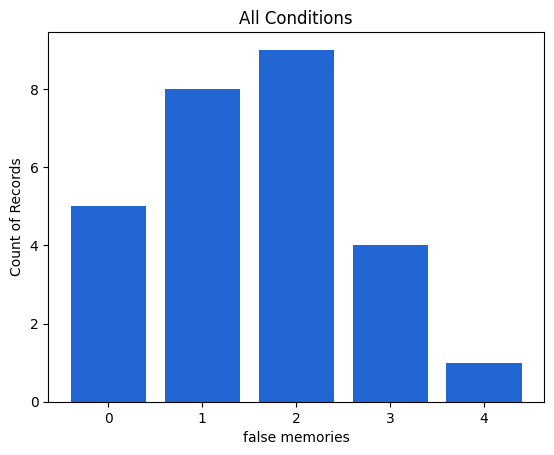

In [23]:
# DeepnoteChart(filtered_columns_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"sort":{"order":"ascending","encoding":"y"},"type":"nominal","field":"Exp_condition","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"false_memories","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"average","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

counts_all = filtered_columns_df['false_memories'].value_counts().sort_index()

import matplotlib.pyplot as plt
plt.bar(counts_all.index, counts_all.values, color='#2266D3')
plt.xlabel('false memories')
plt.ylabel('Count of Records')
plt.title('All Conditions')
plt.show()

In [26]:
# DeepnoteChart(control_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"axis":{"grid":false},"sort":null,"type":"quantitative","field":"false_memories"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""")



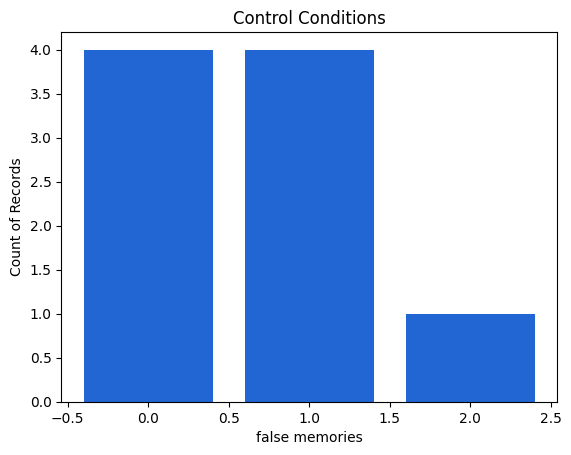

In [24]:
counts_control = control_df['false_memories'].value_counts().sort_index()

import matplotlib.pyplot as plt
plt.bar(counts_control.index, counts_control.values, color='#2266D3')
plt.xlabel('false memories')
plt.ylabel('Count of Records')
plt.title('Control Conditions')
plt.show()

In [28]:
DeepnoteChart(survey_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"axis":{"grid":false},"sort":null,"type":"quantitative","field":"false_memories"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""")

NameError: name 'DeepnoteChart' is not defined

In [ ]:
DeepnoteChart(prescripted_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"axis":{"grid":false},"sort":null,"type":"quantitative","field":"false_memories"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""")

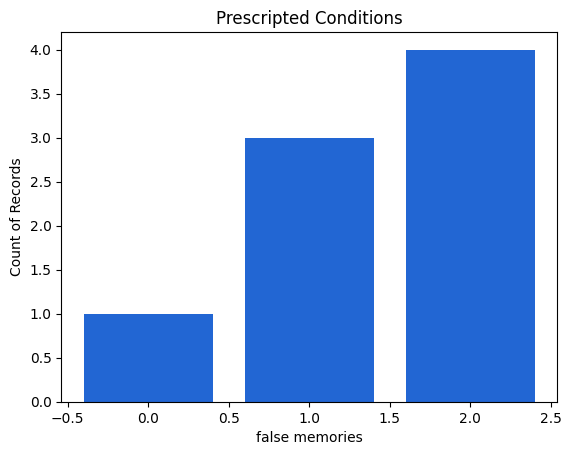

In [25]:
counts_prescripted = prescripted_df['false_memories'].value_counts().sort_index()

import matplotlib.pyplot as plt
plt.bar(counts_prescripted.index, counts_prescripted.values, color='#2266D3')
plt.xlabel('false memories')
plt.ylabel('Count of Records')
plt.title('Prescripted Conditions')
plt.show()

In [ ]:
DeepnoteChart(generative_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"axis":{"grid":false},"sort":null,"type":"quantitative","field":"false_memories"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""")

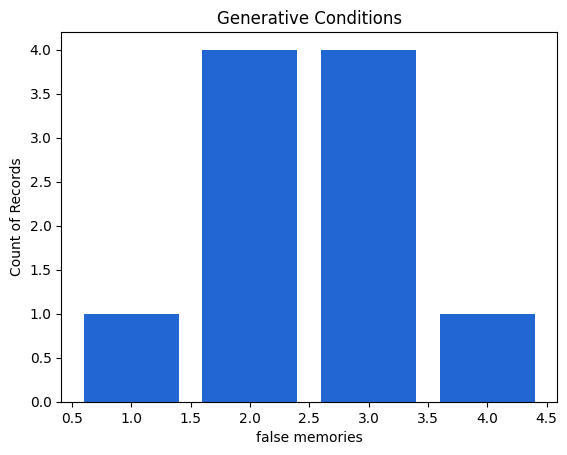

In [26]:
counts_generative = generative_df['false_memories'].value_counts().sort_index()

import matplotlib.pyplot as plt
plt.bar(counts_generative.index, counts_generative.values, color='#2266D3')
plt.xlabel('false memories')
plt.ylabel('Count of Records')
plt.title('Generative Conditions')
plt.show()

In [27]:
# Assuming 'filtered_columns_df' is your DataFrame and it includes the 'Exp_condition' column
exp_condition_counts = filtered_columns_df['Exp_condition'].value_counts()

# Print the counts of each experimental condition
print(exp_condition_counts)

Exp_condition
chatbot           10
none               9
static-chatbot     8
Name: count, dtype: int64


In [28]:
# Initialize a dictionary to store lists of false_memories for each unique Exp_condition
condition_dict = {}

# Loop through each row in the DataFrame
for index, row in filtered_columns_df.iterrows():
    condition = row['Exp_condition']
    memory = row['false_memories']  # Assuming 'false_memories' holds the values to store

    # If the condition is not yet a key in the dictionary, add it with an empty list
    if condition not in condition_dict:
        condition_dict[condition] = []

    # Append the false memory to the appropriate list
    condition_dict[condition].append(memory)


In [29]:
print(condition_dict)

{'chatbot': [3, 1, 2, 3, 3, 2, 4, 3, 2, 2], 'none': [0, 0, 1, 2, 1, 1, 0, 1, 0], 'static-chatbot': [0, 2, 2, 1, 2, 2, 1, 1]}


In [30]:
# Define the specific order of conditions
ordered_conditions = ['none', 'static-chatbot', 'chatbot']

# Prepare data for plotting according to the specified order
memory_lists_ordered = [condition_dict[condition] for condition in ordered_conditions if condition in condition_dict]

In [75]:
# Prepare data for plotting according to the specified order and calculate mean and standard error
means = []
errors = []
sds = []
for condition in ordered_conditions:
    if condition in condition_dict:
        values = condition_dict[condition]
        mean = np.mean(values)
        # Calculate the standard error as the error bar (standard deviation divided by the square root of the sample size)
        std = np.std(values)
        error = np.std(values) / np.sqrt(len(values))
        means.append(mean)
        sds.append(std)
        errors.append(error)

In [76]:
print(means)
print(errors)
print(sds)

[0.6666666666666666, 1.375, 2.5]
[0.22222222222222224, 0.24606274606286907, 0.25495097567963926]
[0.6666666666666667, 0.6959705453537527, 0.806225774829855]


In [84]:
# ordered_labels = ['none', 'survey based', 'prescripted chatbot', 'generative chatbot']
# colors = ['#B0B0B0', '#88CCEE', '#DDCC77', '#CC6677']

ordered_labels = ['none', 'prescripted chatbot', 'prescripted chatbot with feedback']
colors = ['#B0B0B0', '#DDCC77', '#CC6677']

0 and 1 with id: 0
0 and 2 with id: 1
0 and 3 with id: 2
1 and 3 with id: 3


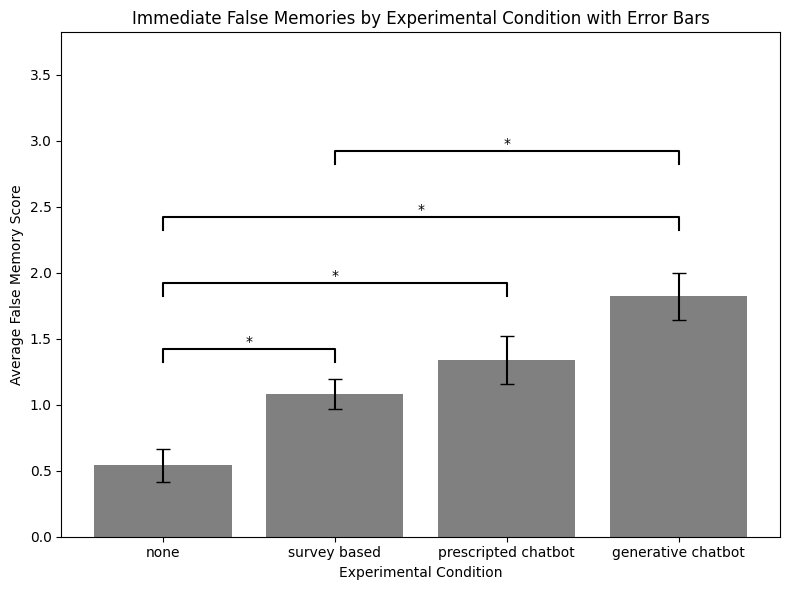

In [ ]:
#  # X positions
# x_pos = np.arange(len(ordered_conditions))

# Significance values (p-values) for the significance markers
# significance_values = [
#     ((0, 1), '*'), # Between 'none' and 'survey-based'
#     ((0, 2), '*'), # Between 'none' and 'static-chatbot'
#     ((0, 3), '*'),# Between 'none' and 'chatbot'    
#     ((1, 3), '*'), # Between 'survey-based' and 'chatbot'
# ]

# # Creating the bar plot with error bars
# plt.figure(figsize=(8, 6))
# bars = plt.bar(x_pos, means, yerr=errors, capsize=5, color='grey')
# plt.title('Immediate False Memories by Experimental Condition with Error Bars')
# plt.ylabel('Average False Memory Score')
# plt.xlabel('Experimental Condition')
# plt.xticks(x_pos, ordered_labels)

# # Adding significance markers with p-values, separate and not overlapping
# y_base_offset = 0.6  # Base vertical offset for significance lines
# y_increment = 0.5  # Increment for each subsequent significance marker

# # Initialize the first y position above the highest bar
# current_y_position = min(means) + max(errors) + y_base_offset

# for idx, ((i, j), label) in enumerate(significance_values):
#     x1, x2 = x_pos[i], x_pos[j]
#     print("{1} and {2} with id: {0}".format(idx, x1, x2))
#     y = current_y_position
#     h, col = 0.1, 'k'
#     plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#     plt.text((x1 + x2) * 0.5, y + h, label, ha='center', va='bottom', color=col)
#     current_y_position += y_increment  # Update the y position for the next marker

# # Adjust plot limits to make space for significance markers
# plt.ylim(0, current_y_position + y_increment)

# # Improve layout
# plt.tight_layout()

# # Show the plot
# plt.show()

3.022222222222222
0 and 2 with id: 0
1 and 2 with id: 1


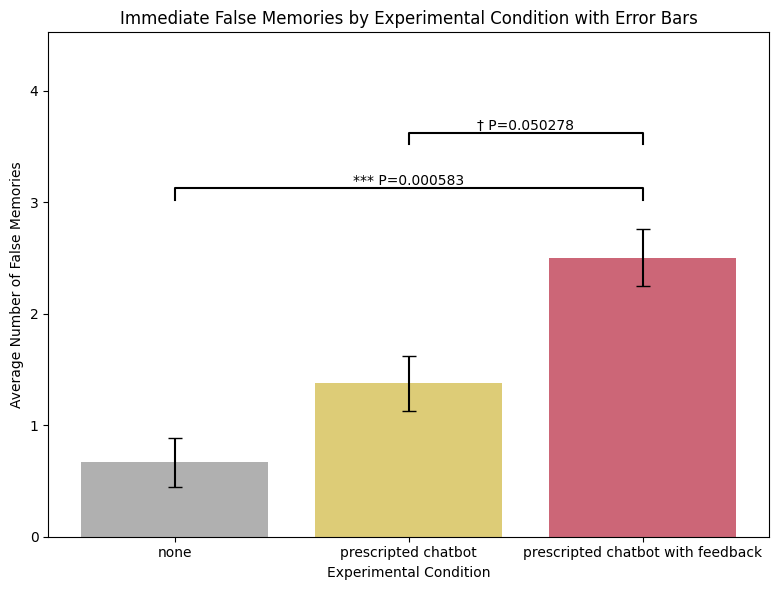

In [85]:
 # X positions
x_pos = np.arange(len(ordered_conditions))

# Significance values (p-values) for the significance markers
# significance_values = [
#     ((0, 1), '** P=0.0058'), # Between 'none' and 'survey-based'
#     ((0, 2), '** P=0.0014'), # Between 'none' and 'prescript-chatbot'
#     ((0, 3), '**** P=1.01e-7'),# Between 'none' and 'generative chatbot'    
#     ((1, 3), '* P=0.0115'), # Between 'survey-based' and 'generative chatbot'
#     ((2, 3), '* P=0.0395'), # Between 'prescript-chatbot' and 'generative chatbot'
# ]

significance_values = [
    ((0, 2), '*** P=0.000583'),# Between 'none' and 'generative chatbot'    
    ((1, 2), '† P=0.050278'), # Between 'prescript-chatbot' and 'generative chatbot'
]


# Creating the bar plot with error bars
plt.figure(figsize=(8, 6))
#bars = plt.bar(x_pos, means, yerr=errors, capsize=5, color=colors)
plt.bar(x_pos, means, yerr=errors, capsize=5, color=colors)
plt.title('Immediate False Memories by Experimental Condition with Error Bars')
plt.ylabel('Average Number of False Memories')
plt.xlabel('Experimental Condition')
plt.xticks(x_pos, ordered_labels)

# Adding significance markers with p-values, separate and not overlapping
y_base_offset = 0.3  # Base vertical offset for significance lines
y_increment = 0.5  # Increment for each subsequent significance marker

# Initialize the first y position above the highest bar
current_y_position = max(means) + min(errors) + y_base_offset
print(current_y_position)

for idx, ((i, j), label) in enumerate(significance_values):
    x1, x2 = x_pos[i], x_pos[j]
    print("{1} and {2} with id: {0}".format(idx, x1, x2))
    y = current_y_position
    h, col = 0.1, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1 + x2) * 0.5, y + h, label, ha='center', va='bottom', color=col)
    current_y_position += y_increment  # Update the y position for the next marker

# Adjust plot limits to make space for significance markers
plt.ylim(0, current_y_position + y_increment)

# Improve layout
plt.tight_layout()

plt.savefig('immediate_false_mem.png')
#plt.savefig('foo.png', bbox_inches='tight')

# Show the plot
plt.show()




## Mean, SD, Error for Immediate False Memories

In [82]:
print(ordered_conditions)
print (means) 
print(sds)
print(errors)

['none', 'static-chatbot', 'chatbot']
[0.6666666666666666, 1.375, 2.5]
[0.6666666666666667, 0.6959705453537527, 0.806225774829855]
[0.22222222222222224, 0.24606274606286907, 0.25495097567963926]


# Normality testing

In [46]:
from scipy.stats import shapiro

# Initialize a dictionary to store the test results
shapiro_results = {}

# Perform the Shapiro-Wilk test for each condition and store the results
for condition in ordered_conditions:
    if condition in condition_dict:
        values = np.array(condition_dict[condition])  # Convert list to NumPy array for processing
        test_statistic, p_value = shapiro(values)
        shapiro_results[condition] = (test_statistic, p_value)

# Display the results
for condition, results in shapiro_results.items():
    print(f"Condition: {condition}\nShapiro-Wilk Test Statistic: {results[0]}, P-Value: {results[1]}\n")

# 

Condition: none
Shapiro-Wilk Test Statistic: 0.6544955336454612, P-Value: 1.3753468796978754e-09

Condition: survey-based
Shapiro-Wilk Test Statistic: 0.8469162443192002, P-Value: 1.2778769313680787e-05

Condition: static-chatbot
Shapiro-Wilk Test Statistic: 0.853259118110841, P-Value: 1.8978782830698743e-05

Condition: chatbot
Shapiro-Wilk Test Statistic: 0.914714783663761, P-Value: 0.0015269302368429148



# Kruskal-Wallis Test

In [40]:
from scipy.stats import kruskal

# Prepare data for the test, ensuring only non-empty lists are included
data = [condition_dict[condition] for condition in ordered_conditions if condition in condition_dict and len(condition_dict[condition]) > 0]

# Check if we have enough groups with data to perform Kruskal-Wallis
if len(data) >= 2:  # We need at least two groups to compare
    # Perform the Kruskal-Wallis H Test
    test_statistic, p_value = kruskal(*data)
    print(f"Kruskal-Wallis H Test Statistic: {test_statistic}, P-Value: {p_value}")
else:
    print("Not enough data to perform Kruskal-Wallis test.")


Kruskal-Wallis H Test Statistic: 14.103145773979096, P-Value: 0.0008660456934544818


In [41]:
# checking how data looks like
print(data)

[[0, 0, 1, 2, 1, 1, 0, 1, 0], [0, 2, 2, 1, 2, 2, 1, 1], [3, 1, 2, 3, 3, 2, 4, 3, 2, 2]]


## Posthoc Dunn Test with Benjamini–Hochberg FDR

In [42]:
#Dunn Test with Benjamini–Hochberg FDR correction

dunn_results_fdr = sp.posthoc_dunn(data, group_col='condition', p_adjust='fdr_bh')

# Print the adjusted p-values for pairwise comparisons
print("Adjusted p-values for pairwise comparisons with FDR:")
print(dunn_results_fdr)
print(dunn_results_fdr <0.05)

#None - 1, prescript - 2, generative - 3

Adjusted p-values for pairwise comparisons with FDR:
          1         2         3
1  1.000000  0.147585  0.000583
2  0.147585  1.000000  0.050278
3  0.000583  0.050278  1.000000
       1      2      3
1  False  False   True
2  False  False  False
3   True  False  False


# Mixed Effect Model

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e32e89f2-6d44-49b2-bfdc-83c1c87a0fb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>